In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

import sys
import os
import math

import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import healpy as hp
import pymaster as nmt
import pyccl as ccl

sys.path.append('..')
from env_config import DATA_PATH, PROJECT_PATH
from utils import get_config, save_correlations
from experiment import Experiment, show_mcmc_report
from plotting import plot_hetdex_image, plot_correlation, plot_correlation_matrix, my_mollview

In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set(style='ticks')
pd.set_option('mode.chained_assignment', None)

In [4]:
data_name = 'LoTSS_DR1'

# Run experiment

In [5]:
config = get_config(data_name)
display(config)

In [6]:
experiment = Experiment(config, set_data=True, set_maps=True)

22/11/2021 13:30:07 INFO: Setting data..
22/11/2021 13:30:07 INFO: Setting maps..


Original LoTSS DR1 datashape: (318520, 119)
Total flux of S > 2 mJy: (57928, 119)
Signal to noise > 5: (57698, 119)


/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".forma

here 6
here 7


In [7]:
experiment.set_correlations(with_covariance=True)

22/11/2021 13:30:11 INFO: Setting data correlations..


data correlations:   0%|          | 0/1 [00:00<?, ?it/s]

22/11/2021 13:30:14 INFO: Setting theory correlations..
22/11/2021 13:30:15 INFO: Setting covariance..


covariance matrices:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
save_correlations(experiment)

# Likelihood inference

Mean acceptance fraction: 0.8069901315789474
Number of iterations: 2660


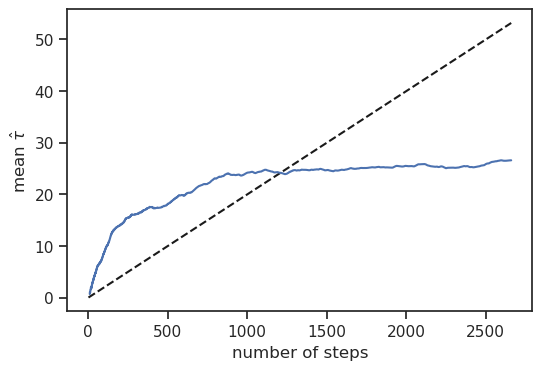

burn-in: 53
thin: 13
flat chain shape: (200, 32, 1)
flat log prob shape: (200, 32)


<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,


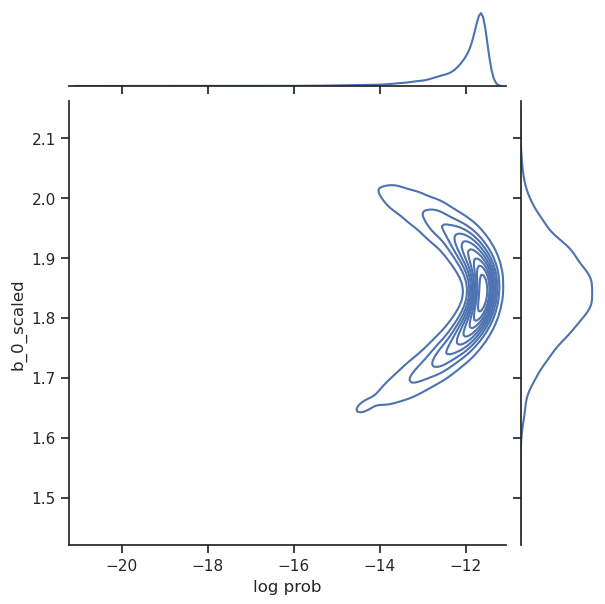

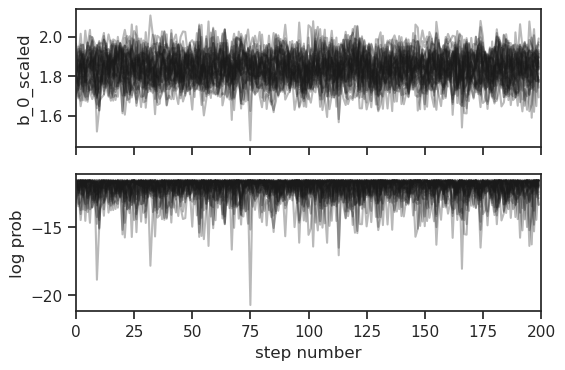

In [11]:
# deep fields, errored, bias = 1.4, gg only
experiment_name = 'gg__b_0_scaled__gg-only'
show_mcmc_report(experiment_name, data_name, burnin=None, thin=None)

Mean acceptance fraction: 0.8049136971046771
Number of iterations: 449


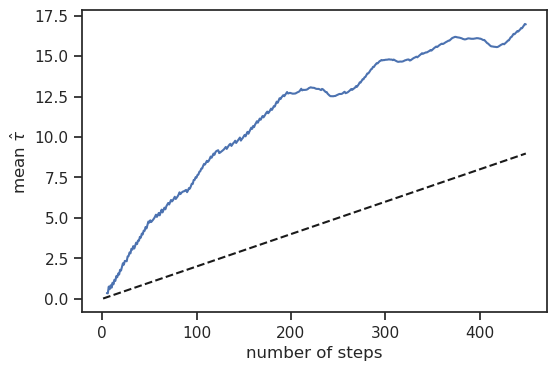

burn-in: 33
thin: 8
flat chain shape: (52, 32, 1)
flat log prob shape: (52, 32)


<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,


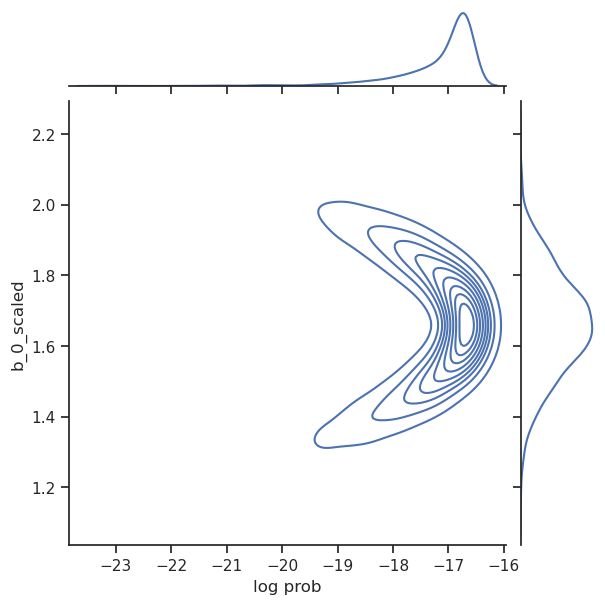

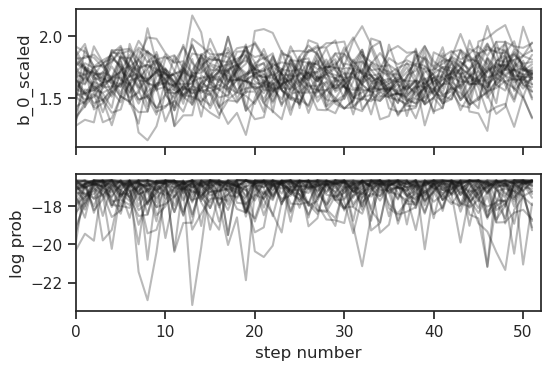

In [9]:
# deep fields, errored, bias = 1.4, gk only
experiment_name = 'gk__b_0_scaled__gk-only'
show_mcmc_report(experiment_name, data_name, burnin=None, thin=None)

Mean acceptance fraction: 0.8032674091141834
Number of iterations: 1953


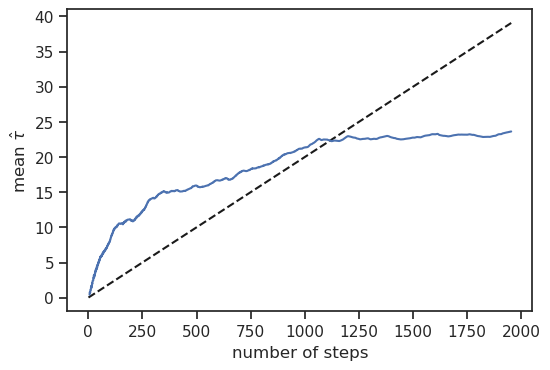

burn-in: 47
thin: 11
flat chain shape: (173, 32, 1)
flat log prob shape: (173, 32)


<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,


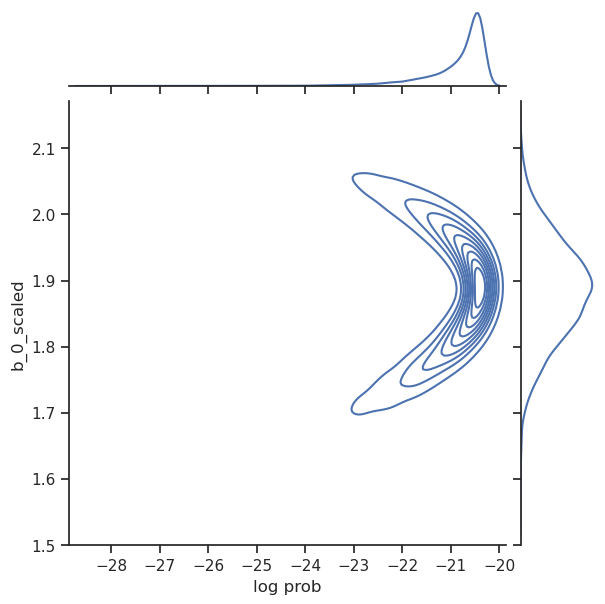

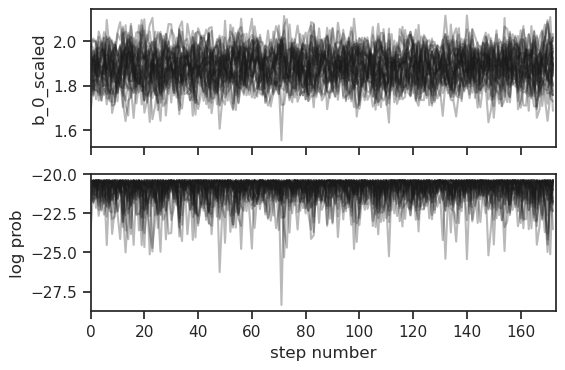

In [21]:
# deep fields, errored, bias = 1.4
experiment_name = 'gg-gk__b_0_scaled__deep-nz-bias-1-4'
show_mcmc_report(experiment_name, data_name, burnin=None, thin=None)

Mean acceptance fraction: 0.8004016953441295
Number of iterations: 1976


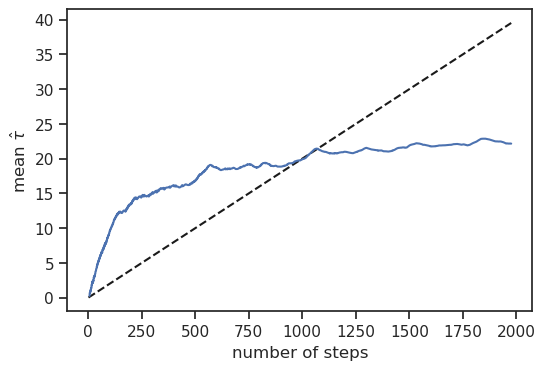

burn-in: 44
thin: 11
flat chain shape: (175, 32, 1)
flat log prob shape: (175, 32)


<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,


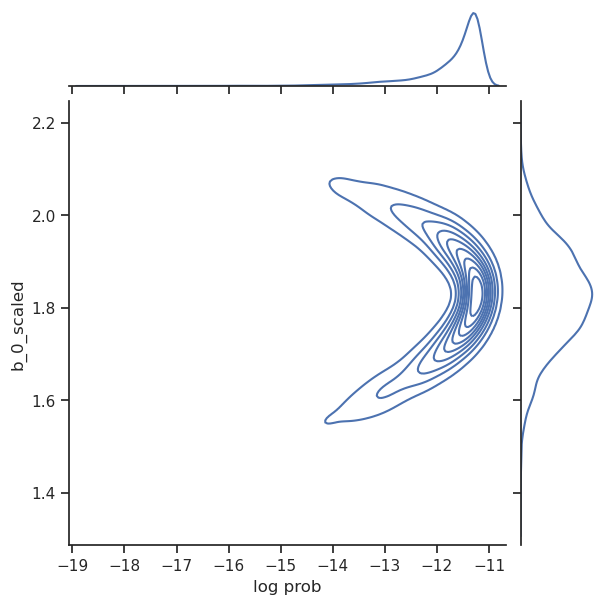

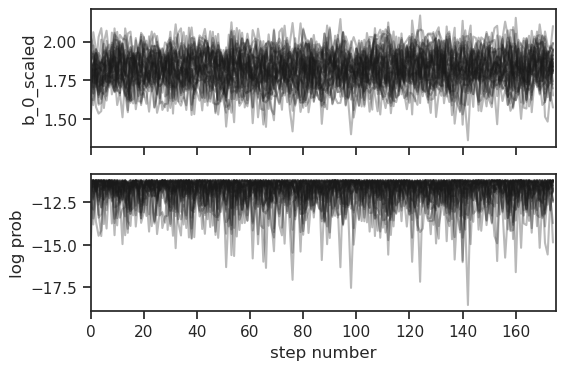

In [22]:
# deep fields, errored, bias = 2.1
experiment_name = 'gg-gk__b_0_scaled__deep-nz'
show_mcmc_report(experiment_name, data_name, burnin=None, thin=None)

Mean acceptance fraction: 0.8106610622850593
Number of iterations: 2617


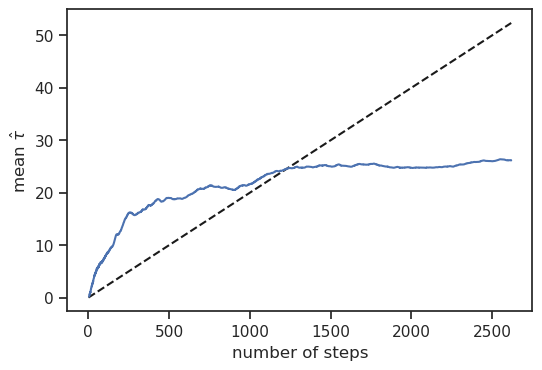

burn-in: 52
thin: 13
flat chain shape: (197, 32, 1)
flat log prob shape: (197, 32)


<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,


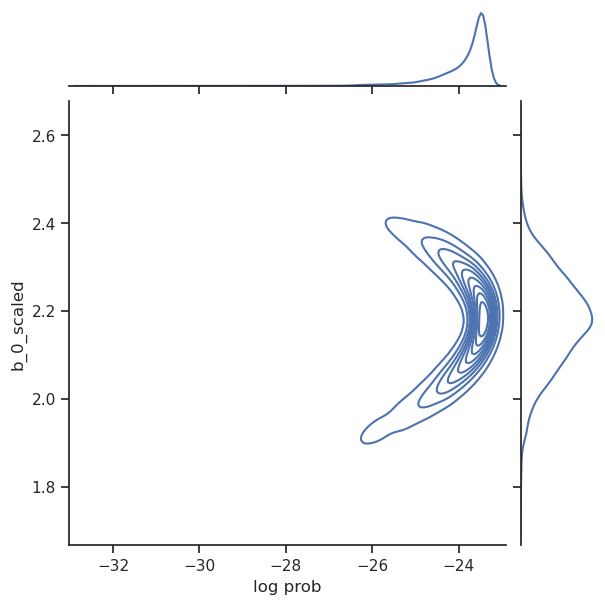

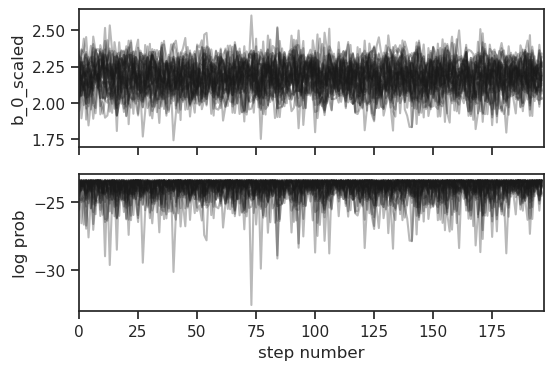

In [13]:
# z tailed, errored
experiment_name = 'gg-gk__b_0_scaled__test-0'
show_mcmc_report(experiment_name, data_name, burnin=None, thin=None)

Mean acceptance fraction: 0.8056384597378277
Number of iterations: 2136


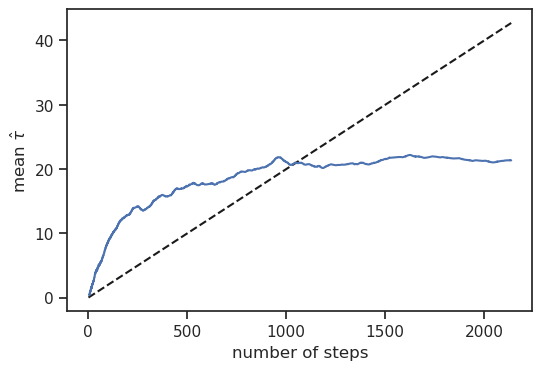

burn-in: 42
thin: 10
flat chain shape: (209, 32, 1)
flat log prob shape: (209, 32)


<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,


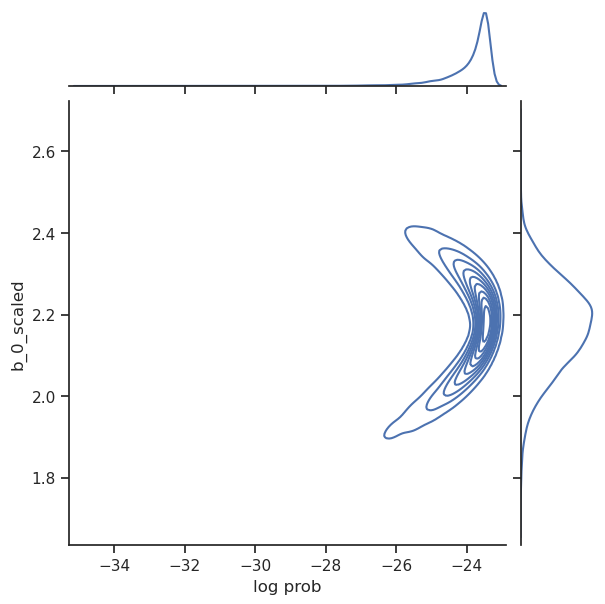

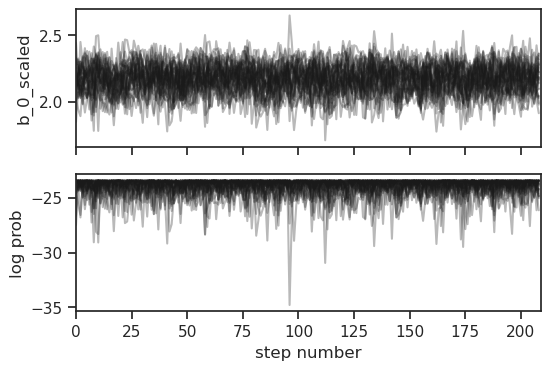

In [6]:
# z tailed
experiment_name = 'gg-gk__b_0_scaled__test'
show_mcmc_report(experiment_name, data_name, burnin=None, thin=None)

Mean acceptance fraction: 0.6940086206896552
Number of iterations: 725


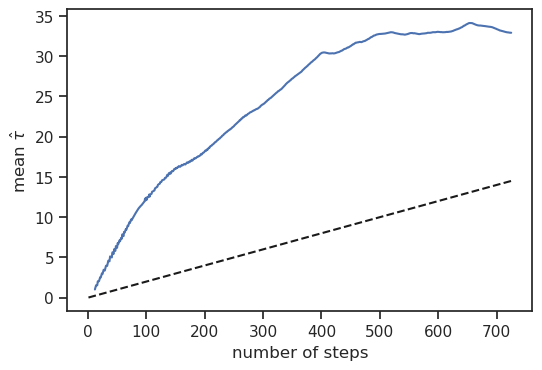

burn-in: 66
thin: 16
flat chain shape: (41, 32, 2)
flat log prob shape: (41, 32)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,


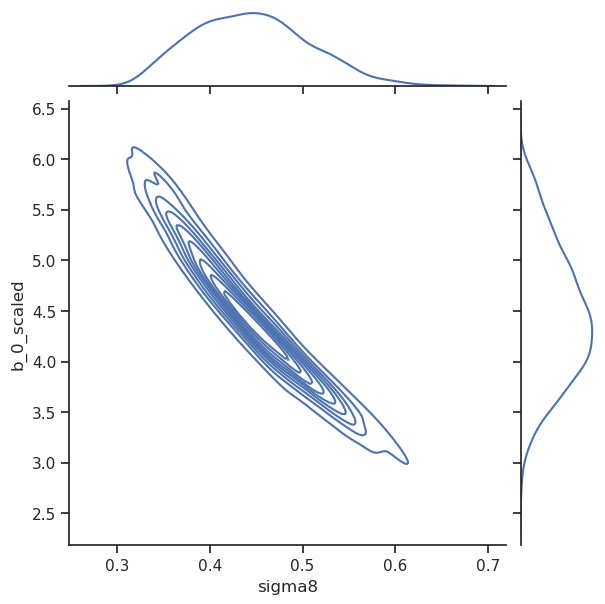

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,


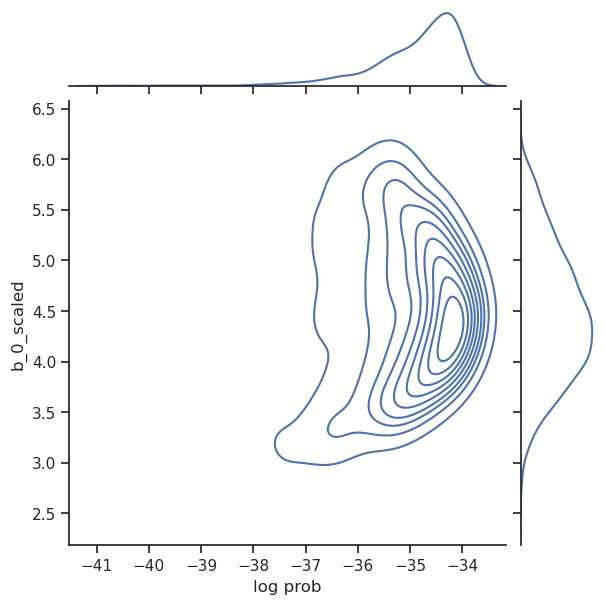

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,


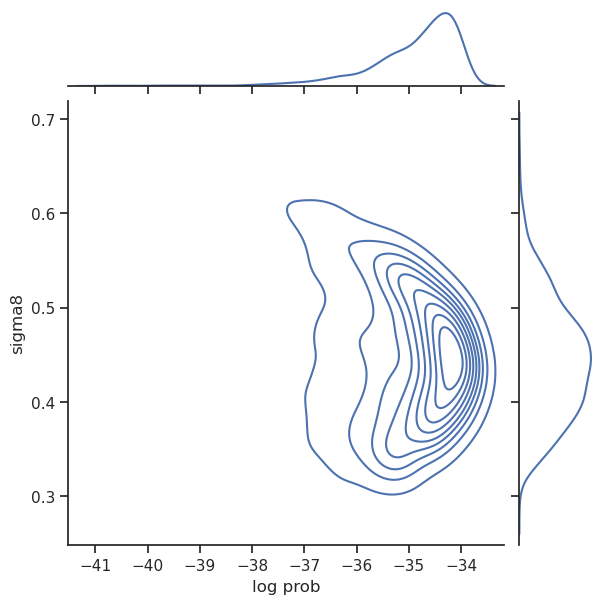

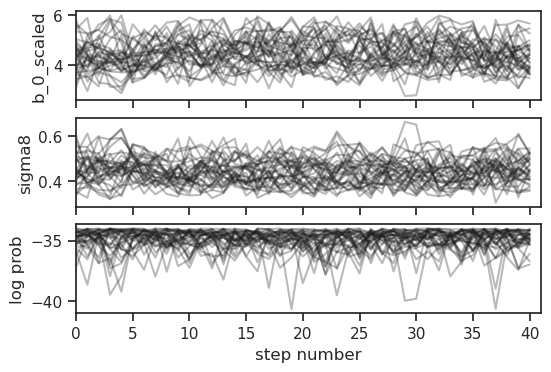

In [8]:
# New result
experiment_name = 'gg-gk__b_0_scaled_sigma8__priors'
show_mcmc_report(experiment_name, data_name, burnin=None, thin=None)

Mean acceptance fraction: 0.6938881215469613
Number of iterations: 724


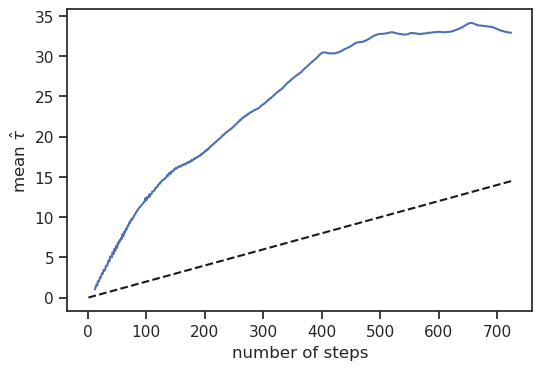

burn-in: 66
thin: 16
flat chain shape: (41, 32, 2)
flat log prob shape: (41, 32)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'stat_func'
  **contour_kws,
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/seaborn/dist

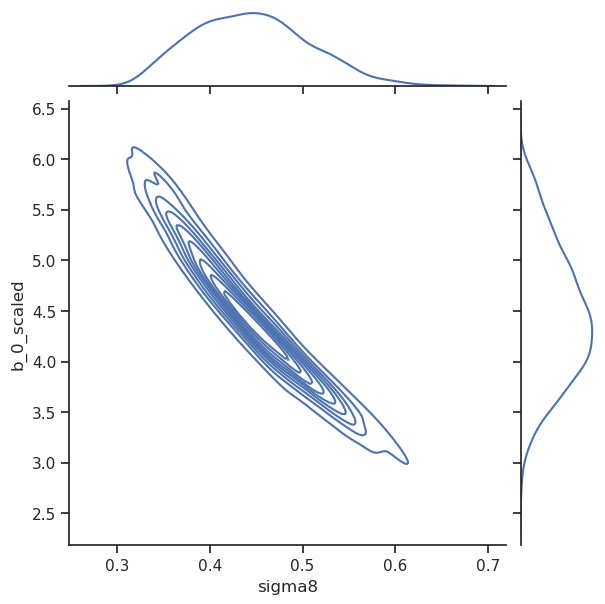

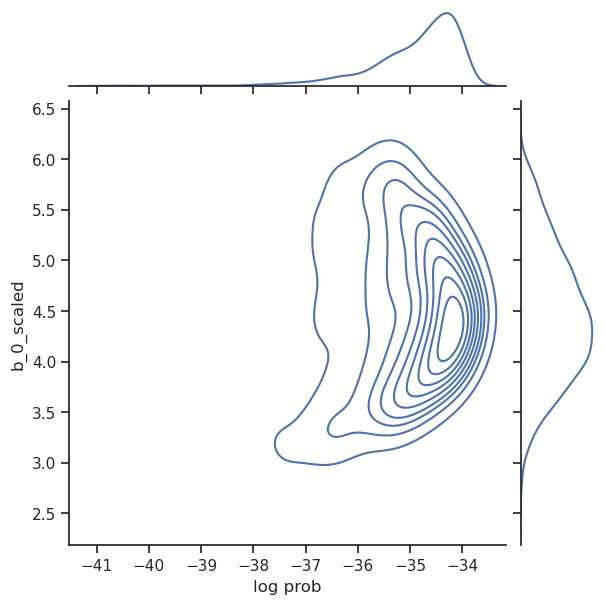

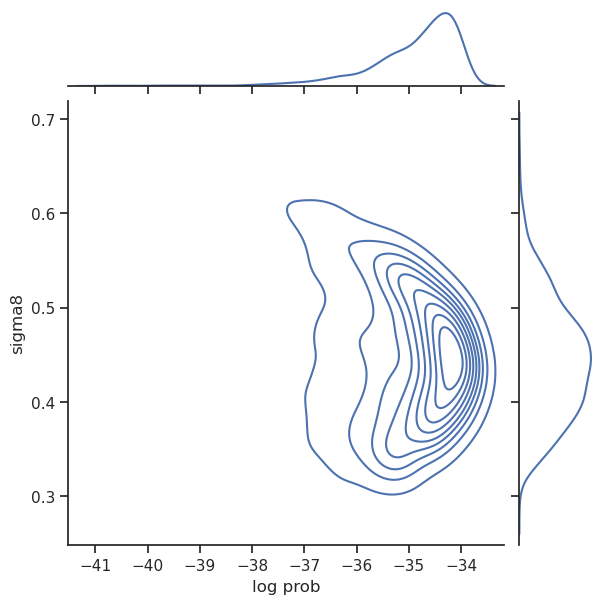

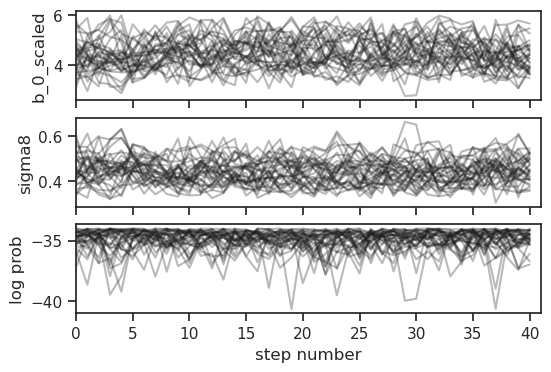

In [10]:
# New result
experiment_name = 'gg-gk__b_0_scaled_sigma8__priors'
show_mcmc_report(experiment_name, burnin=None, thin=None)

# Power spectra

In [7]:
# Weird from MCMC
experiment.print_correlation_statistics()

C_gg sigma: 31.89
C_gg chi squared: 17.99
C_gk sigma: 5.75
C_gk chi squared: 8.21


In [7]:
experiment.print_correlation_statistics()

C_gg sigma: 32.26
C_gg chi squared: 21.93
C_gk sigma: 5.02
C_gk chi squared: 9.33


In [7]:
# srl
experiment.print_correlation_statistics()

C_gg sigma: 38.78
C_gg chi squared: 50.76
C_gk sigma: 5.37
C_gk chi squared: 9.98


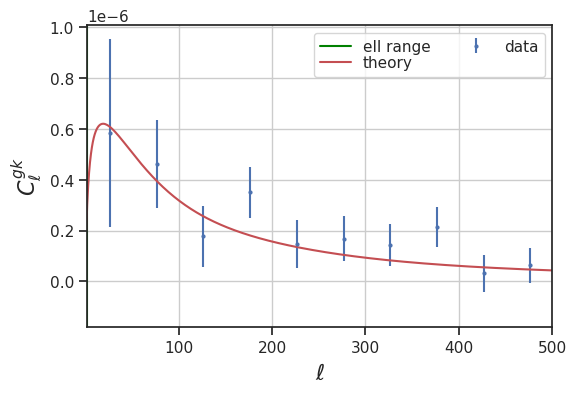

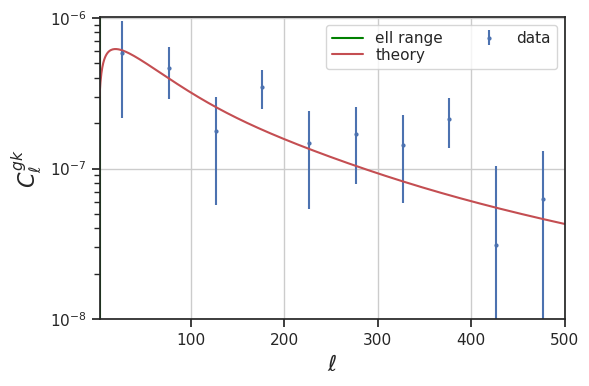

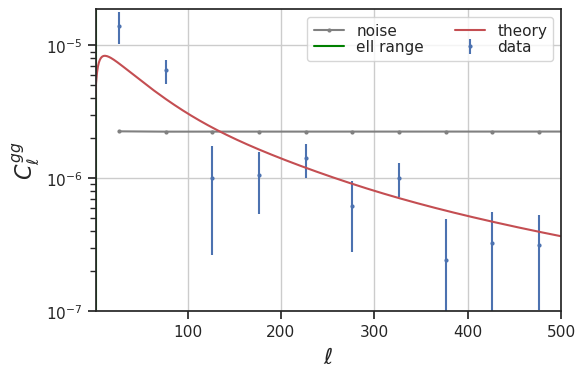

In [8]:
# optical, bin 50, weird from MCMC, both bias and sigma_8
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='linear')
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

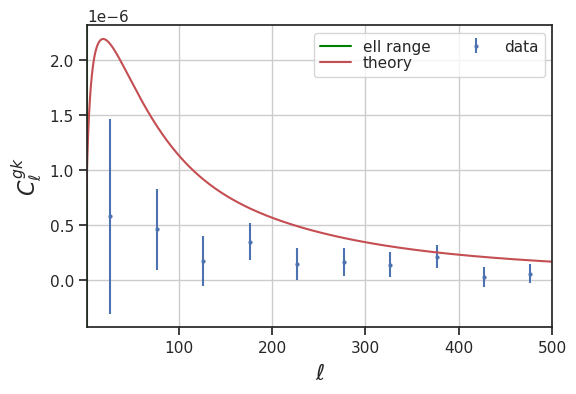

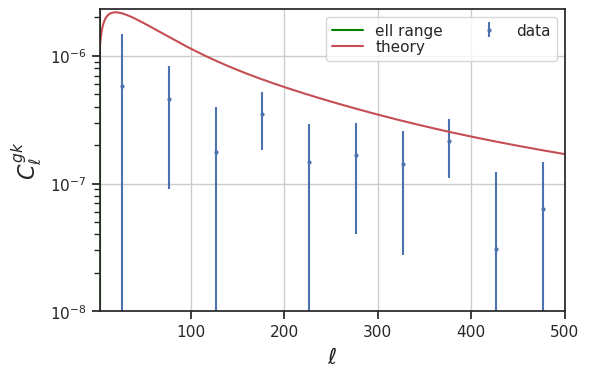

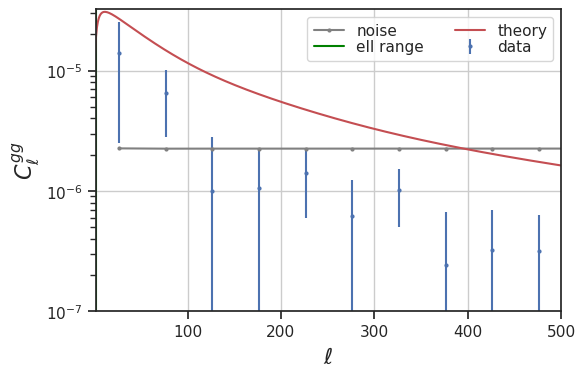

In [7]:
# TO UPDATE
# optical, bin 50, weird from MCMC, bias only
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='linear')
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

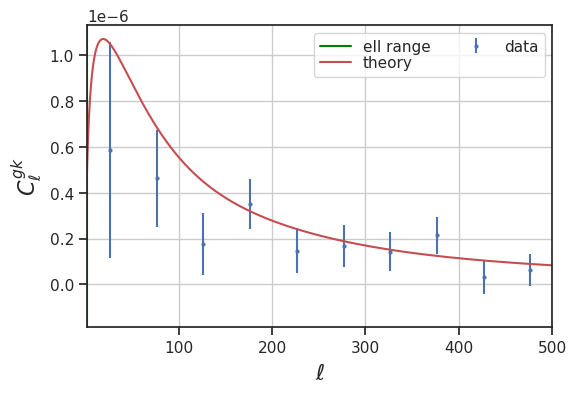

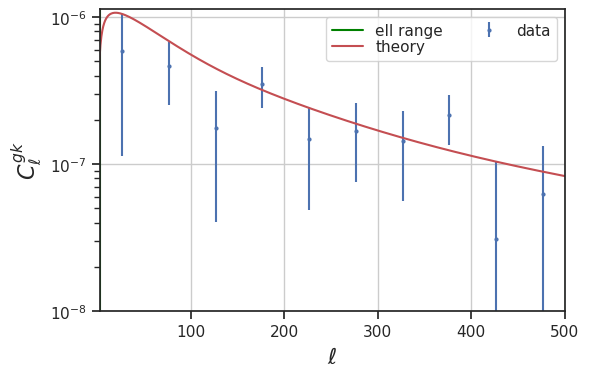

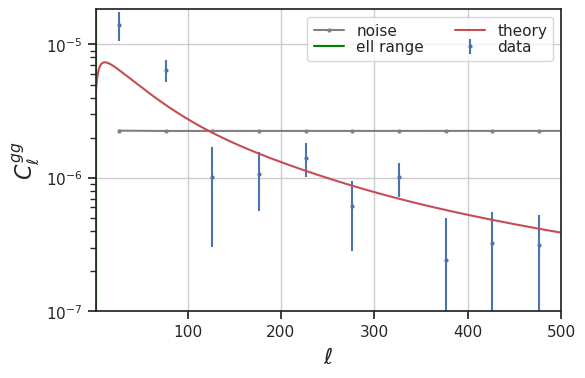

In [8]:
# optical, bin 50
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='linear')
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

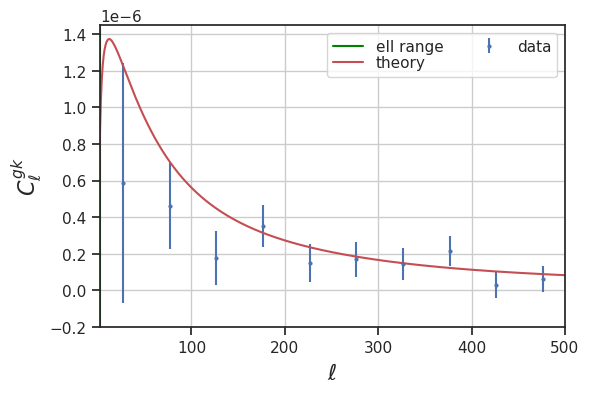

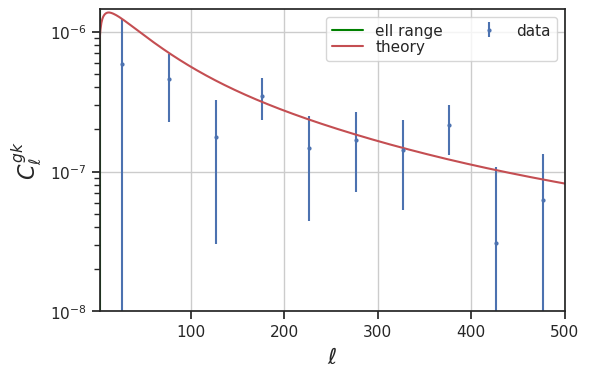

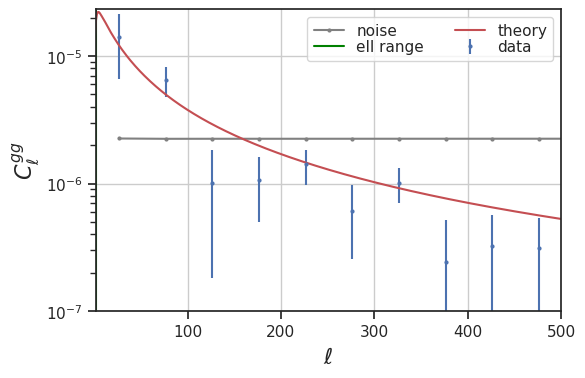

In [8]:
# HERE
# optical, bin 50, N(z) from deep fields, bias = 2.1
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='linear')
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

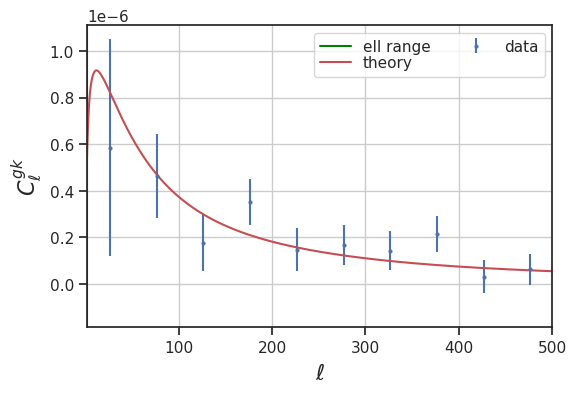

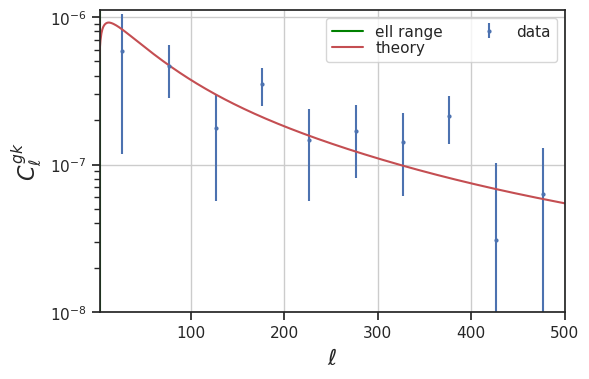

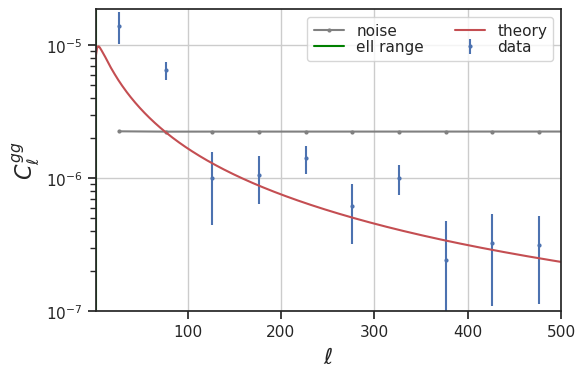

In [8]:
# HERE
# optical, bin 50, N(z) from deep fields, bias = 1.4
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='linear')
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

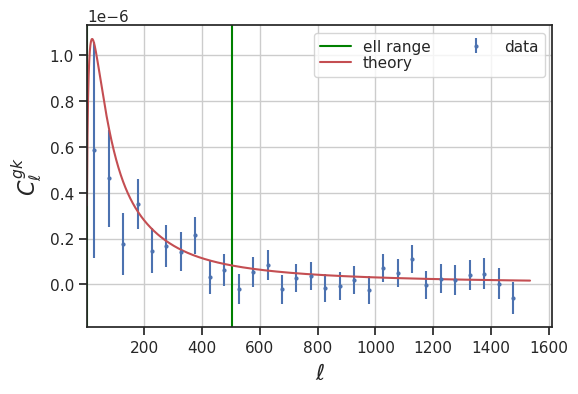

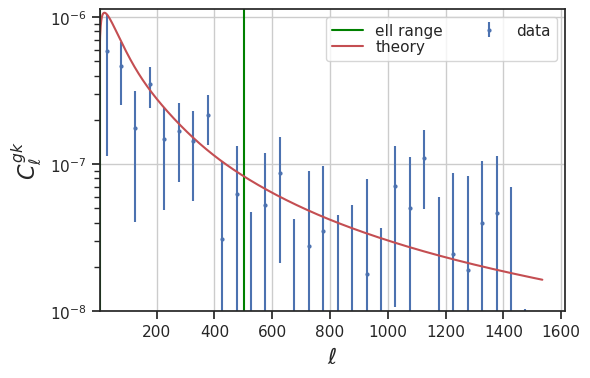

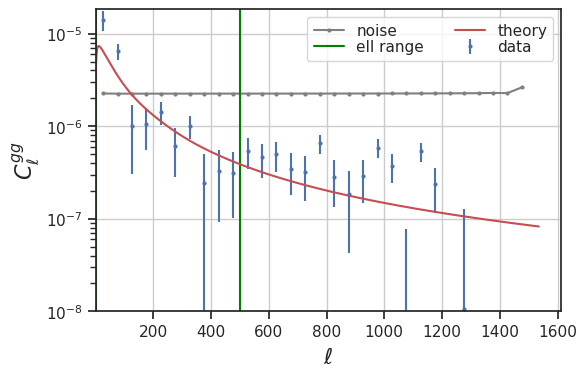

In [8]:
# optical, bin 50
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=None, y_max=None, x_scale='linear', y_scale='linear')
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

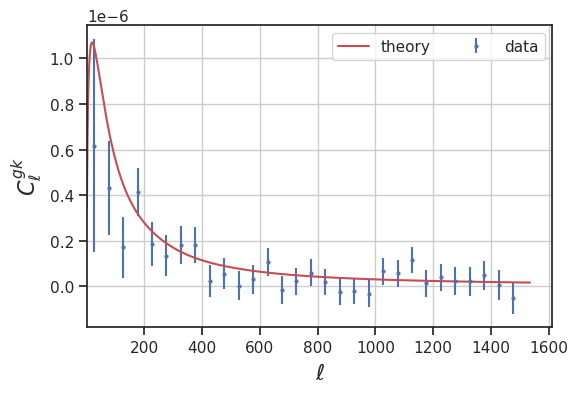

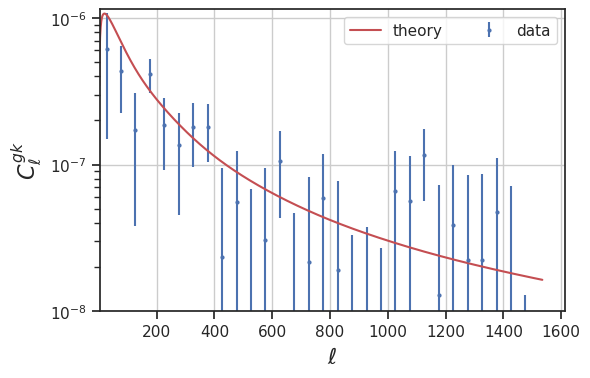

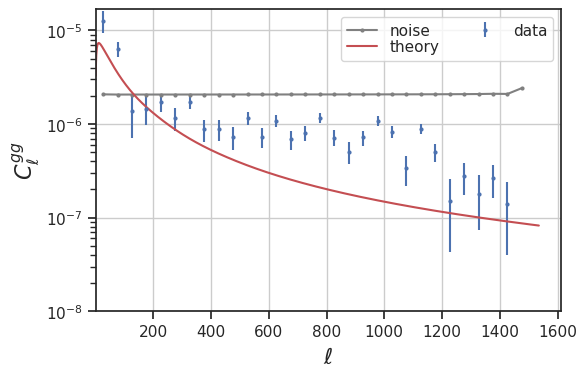

In [7]:
# srl, bin 50
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=None, y_max=None, x_scale='linear', y_scale='linear')
plot_correlation(experiment, 'gk', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')
plot_correlation(experiment, 'gg', x_min=2, x_max=None, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

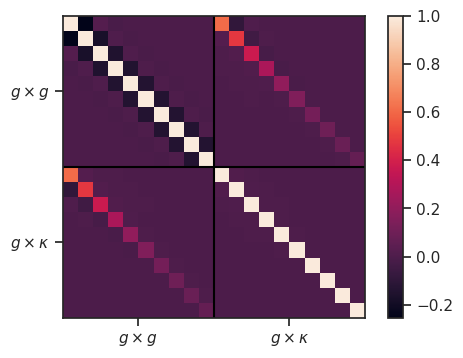

In [9]:
plot_correlation_matrix(experiment)

# Comparison with David's Cls

In [13]:
david_cls = np.load(os.path.join(DATA_PATH, 'LoTSS/DR1/Alonso/cls_lotss_DR1.npz'))

In [14]:
for k in david_cls:
    print(k)

l_eff
cl_gg
nl_gg
cl_th_gg
cl_gk
nl_gk
cl_th_gk
cl_kk
nl_kk
cl_th_kk
cov_gggg
cov_gggk
cov_ggkk
cov_gkgk
cov_gkkk
cov_kkkk
z_g
nz_g
bz_g


In [ ]:
self.noise_curves = defaultdict(int)
self.noise_decoupled = defaultdict(int)

# Correlation containers

self.theory_correlations = {}
self.data_correlations = {}
self.raw_data_correlations = {}

self.covariance_matrices = {}
self.errors = {}
self.correlation_matrices = {}

In [39]:
n_ells = experiment.binnings['gg'].get_effective_ells().shape[0]
for corr_symbol in ['gg', 'gk']:
    experiment.errors[corr_symbol] = np.sqrt(np.diag(david_cls['cov_{cs}{cs}'.format(cs=corr_symbol)]))[:n_ells]
    experiment.data_correlations[corr_symbol] = david_cls['cl_{}'.format(corr_symbol)][:n_ells]
    experiment.noise_decoupled[corr_symbol] = david_cls['nl_{}'.format(corr_symbol)][:n_ells]
    experiment.theory_correlations[corr_symbol] = david_cls['cl_th_{}'.format(corr_symbol)][:n_ells]
    experiment.noise_curves[corr_symbol] = david_cls['nl_{}'.format(corr_symbol)][:n_ells]

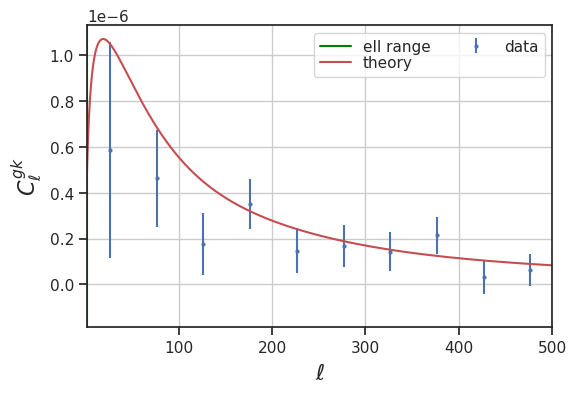

In [8]:
# My
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='linear')

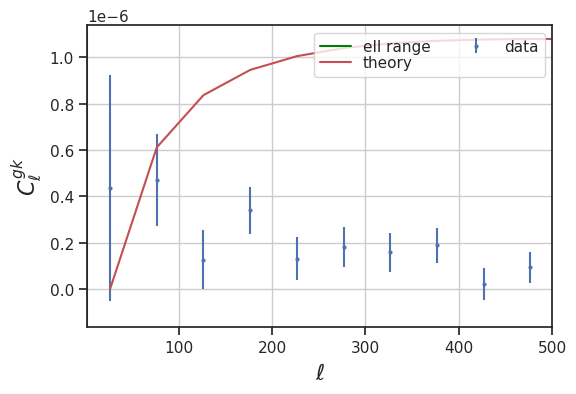

In [42]:
# David's
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=None, y_max=None, x_scale='linear', y_scale='linear')

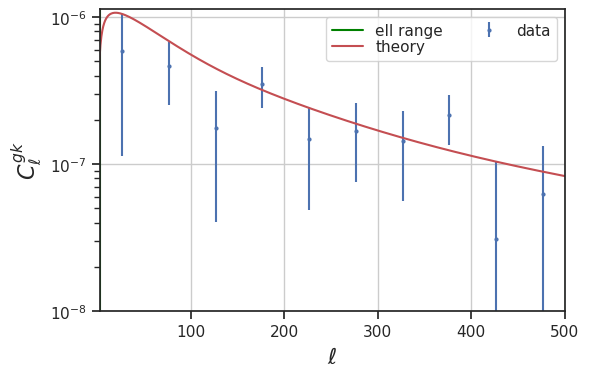

In [9]:
# My
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

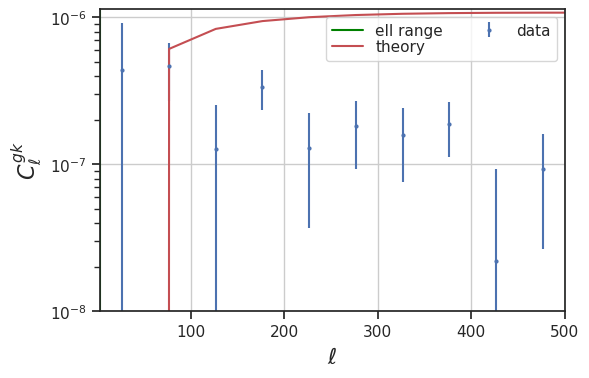

In [43]:
# David's
plot_correlation(experiment, 'gk', x_min=2, x_max=500, y_min=1e-8, y_max=None, x_scale='linear', y_scale='log')

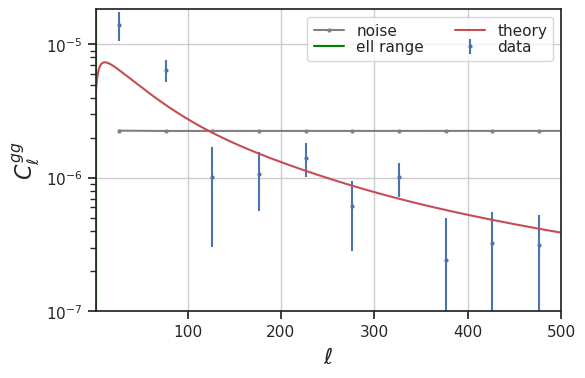

In [10]:
# My
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

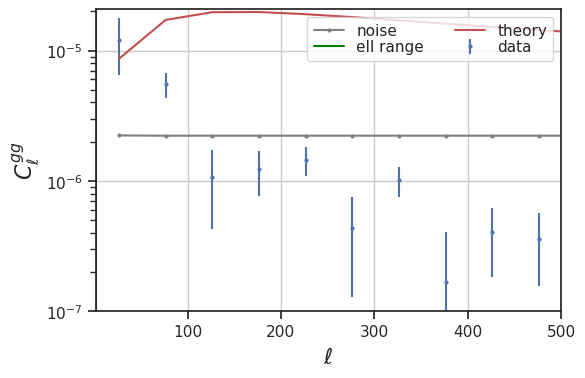

In [44]:
# David's
plot_correlation(experiment, 'gg', x_min=2, x_max=500, y_min=1e-7, y_max=None, x_scale='linear', y_scale='log')

# Optical vs non optical

In [4]:
from collections import OrderedDict

import pymaster as nmt

from data_lotss import get_lotss_data, get_lotss_dr1_mask
from utils import get_map, get_masked_map, compute_master, get_shot_noise, get_overdensity_map
from plotting import my_mollview, plot_custom_correlation

In [5]:
dr = 1
flux_min_cut = 2
nside = 512

In [6]:
data_dict = OrderedDict()
data_dict['opti'] = get_lotss_data(dr, flux_min_cut, optical=True)
data_dict['srl'] = get_lotss_data(dr, flux_min_cut, optical=False)

data_dict['common'] = data_dict['opti'].loc[data_dict['opti']['Source_Name'].isin(data_dict['srl']['Source_Name'])]
data_dict['opti_unique'] = data_dict['opti'].loc[~data_dict['opti']['Source_Name'].isin(data_dict['srl']['Source_Name'])]
data_dict['srl_unique'] = data_dict['srl'].loc[~data_dict['srl']['Source_Name'].isin(data_dict['opti']['Source_Name'])]

Original LoTSS DR1 datashape: (318520, 119)
Total flux of S > 2 mJy: (57928, 119)
Original LoTSS DR1 datashape: (325694, 29)
Total flux of S > 2 mJy: (62958, 29)


In [7]:
for key, data in data_dict.items():
    print(key, data.shape)

opti (57928, 119)
srl (62958, 29)
common (54002, 119)
opti_unique (3926, 119)
srl_unique (8956, 29)


In [8]:
maps = {}
mask = get_lotss_dr1_mask(nside)
for key, data in data_dict.items():
    maps[key] = get_map(data['RA'].values, data['DEC'].values, nside)
    maps[key] = get_masked_map(maps[key], mask)

In [59]:
name = 'srl_unique'
binning = nmt.NmtBin.from_nside_linear(nside, 50)
overdensity_map = get_overdensity_map(maps[name], mask)
field = nmt.NmtField(mask, [overdensity_map])
correlation, workspace = compute_master(field, field, binning)

noise = np.full(3 * nside, get_shot_noise(maps[name], mask))
noise = workspace.decouple_cell([noise])[0]

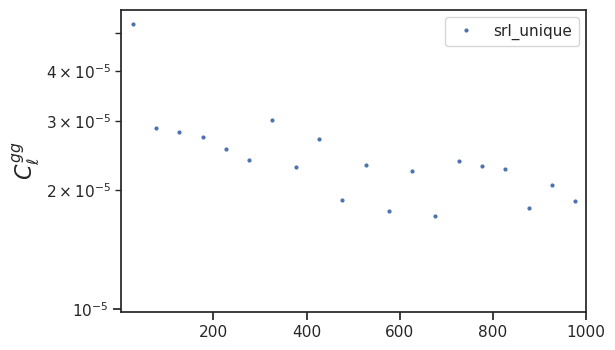

In [58]:
ell_arr = binning.get_effective_ells()
plot_custom_correlation((ell_arr, correlation, noise, correlation_symbol='gg', x_scale='linear', y_scale='log',
                        x_min=2, x_max=1000, y_min=None, y_max=None)

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 15.287792 arcmin (0.004447 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 36.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))


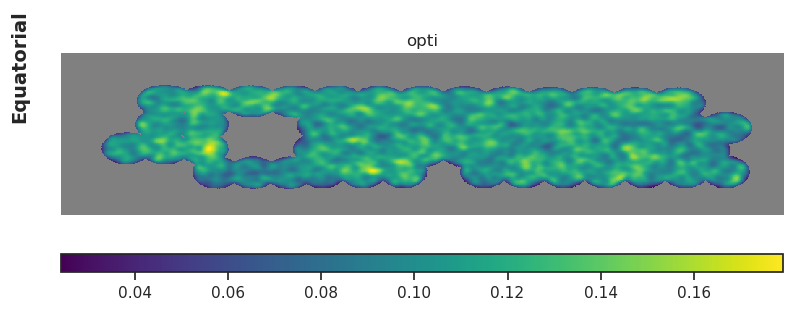

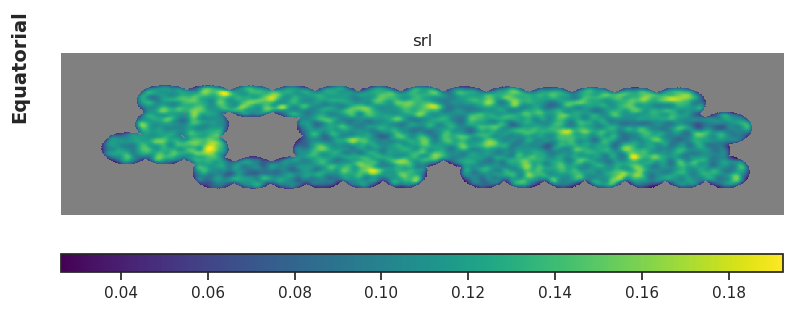

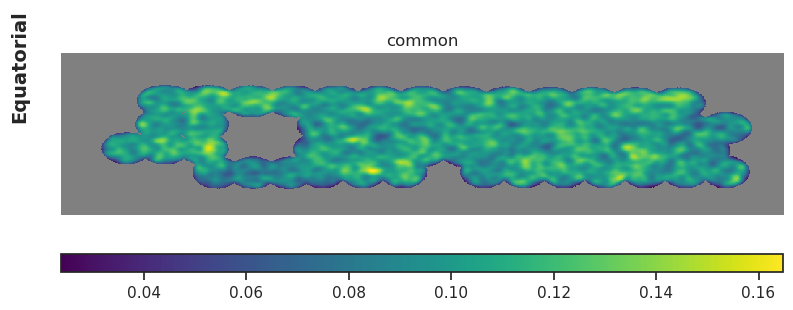

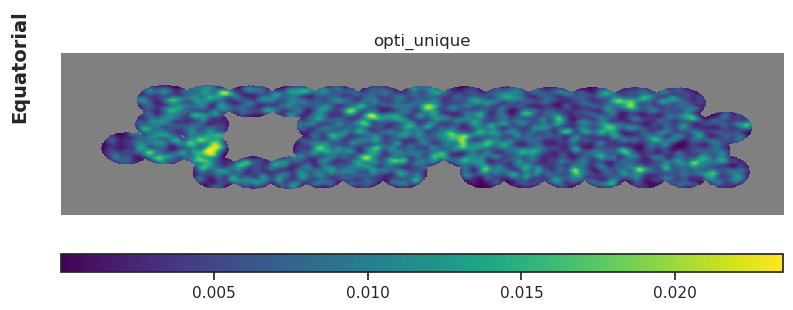

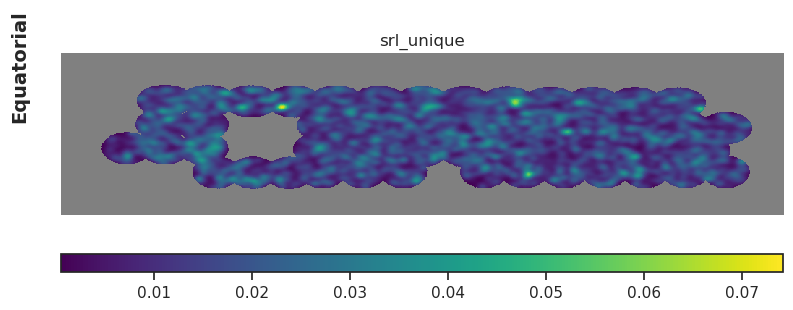

In [11]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100
for key, map in maps.items():
    plot_hetdex_image(map, title=key, fwhm=math.radians(0.6))

# Maps

/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 15.287792 arcmin (0.004447 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 36.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:824: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  sigma * 60 * 180 / np.pi, sigma
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/sphtfunc.py:829: UserWarning: -> fwhm is 0.000000 arcmin
  sigma * 60 * 180 / np.pi * (2.0 * np.sqrt(2.0 * np.log(2.0)))
/home/snakoneczny/tools/anaconda3/envs/py37_isw/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, y

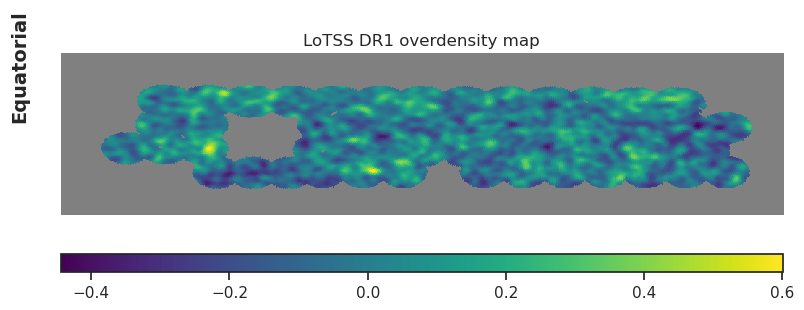

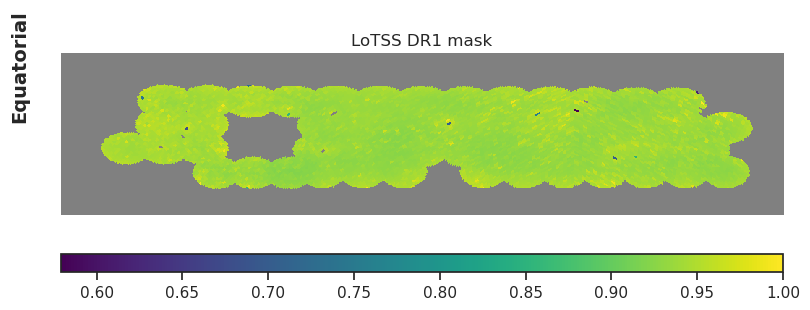

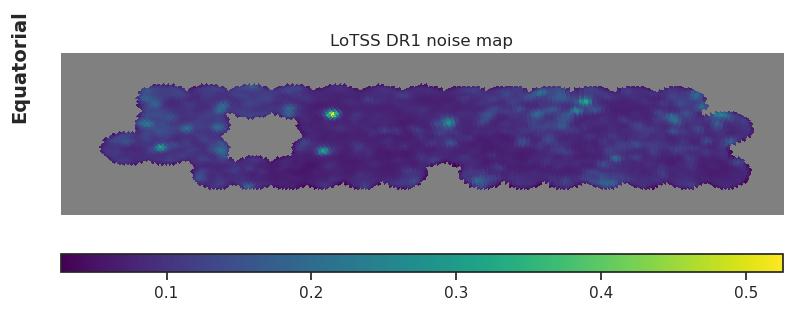

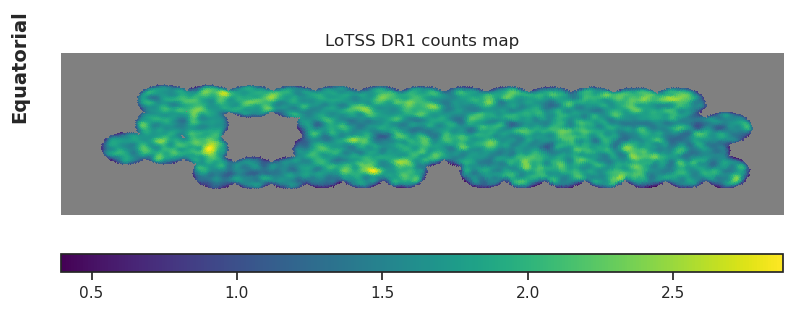

In [10]:
plot_hetdex_image(experiment.processed_maps['g'], title='LoTSS DR1 overdensity map', fwhm=math.radians(0.6))
plot_hetdex_image(experiment.masks['g'], title='LoTSS DR1 mask')
plot_hetdex_image(experiment.noise_maps['g'], title='LoTSS DR1 noise map', fwhm=math.radians(0.6))
plot_hetdex_image(experiment.base_maps['g'], title='LoTSS DR1 counts map', fwhm=math.radians(0.6))

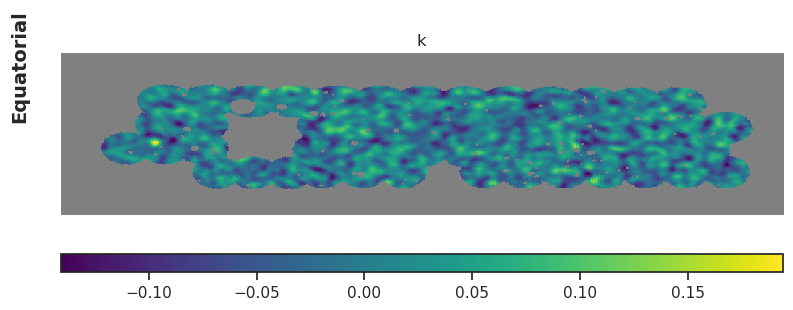

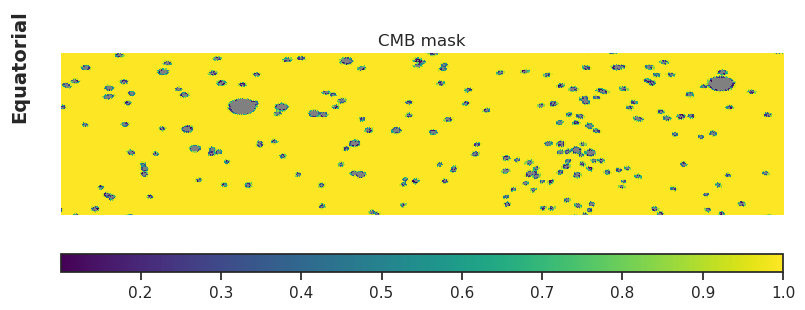

In [11]:
plot_hetdex_image(experiment.base_maps['k'], experiment.masks['g'], title='k', fwhm=math.radians(0.6))
plot_hetdex_image(experiment.masks['k'], title='CMB mask')